# Lab 4 - part2
### Edge Detection

https://github.com/scikit-image/scikit-image/blob/master/skimage/filters/edges.py

http://scikit-image.org/docs/0.11.x/auto_examples/plot_edge_filter.html

http://scikit-image.org/docs/dev/auto_examples/edges/plot_canny.html



In [2]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [ ]:
'''
1. Built-in Sobel, Prewitt, Roberts, Canny
2. Custom Sobel (V-H-Both)
3. Custom LoG
'''

'\n1. Built-in Sobel, Prewill, Roberts, Canny\n2. Custom Sobel (V-H-Both)\n3. Custom LoG\n'

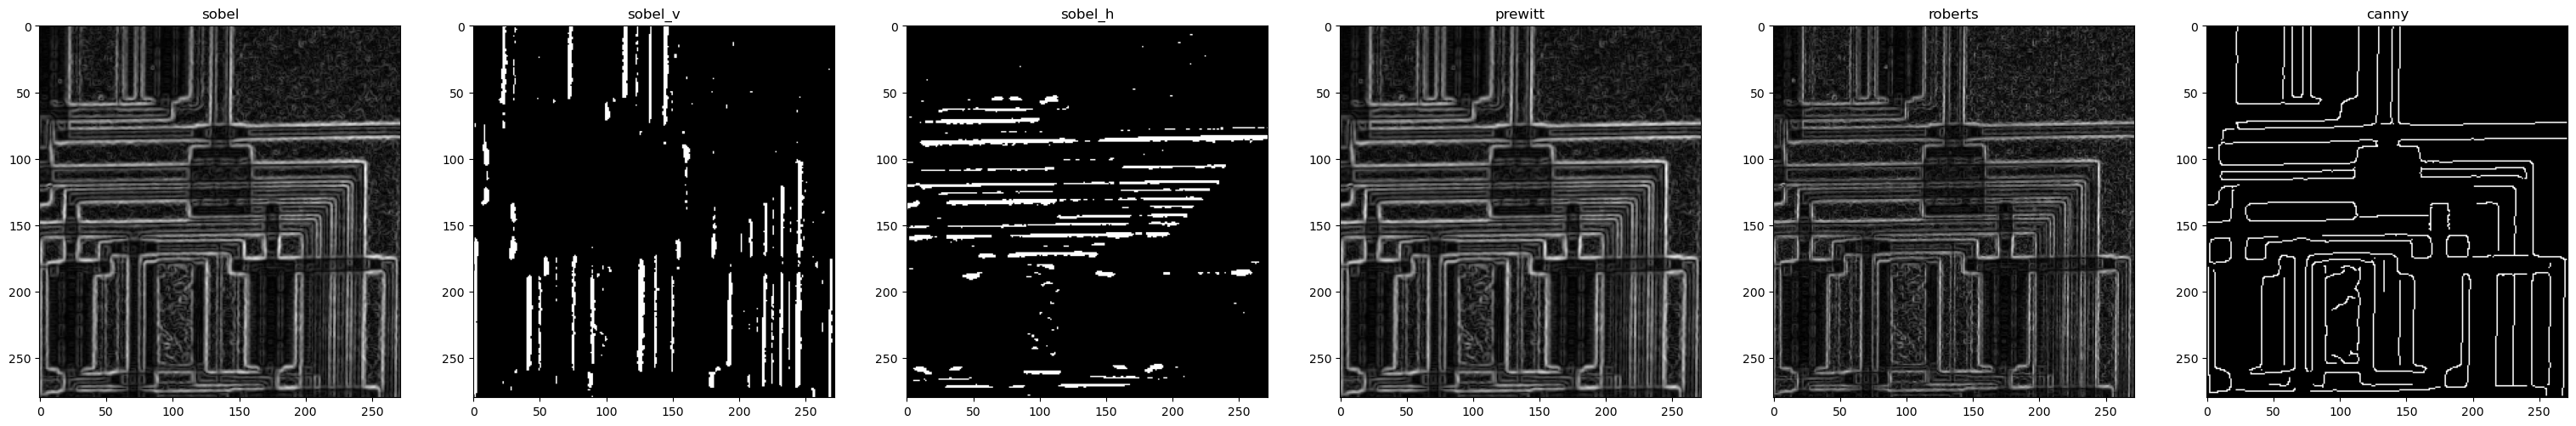

In [25]:
# 1. Built-in Sobel, Prewitt, Roberts, Canny

img = io.imread('circuit.tif', True)

edge_sobel = sobel(img)
edge_sobel_v = sobel_v(img) > 0.08
edge_sobel_h = sobel_h(img) > 0.08

edge_prewitt = prewitt(img)
edge_roberts = roberts(img)
edge_canny = canny(img, sigma=2)

show_images([edge_sobel, edge_sobel_v, edge_sobel_h, edge_prewitt, edge_roberts, edge_canny],
             ['sobel', 'sobel_v', 'sobel_h', 'prewitt', 'roberts', 'canny'])

# Roberts is the most affected with noise due to small kernel size
# Canny has less noise due to gaussian smoothing, single response 

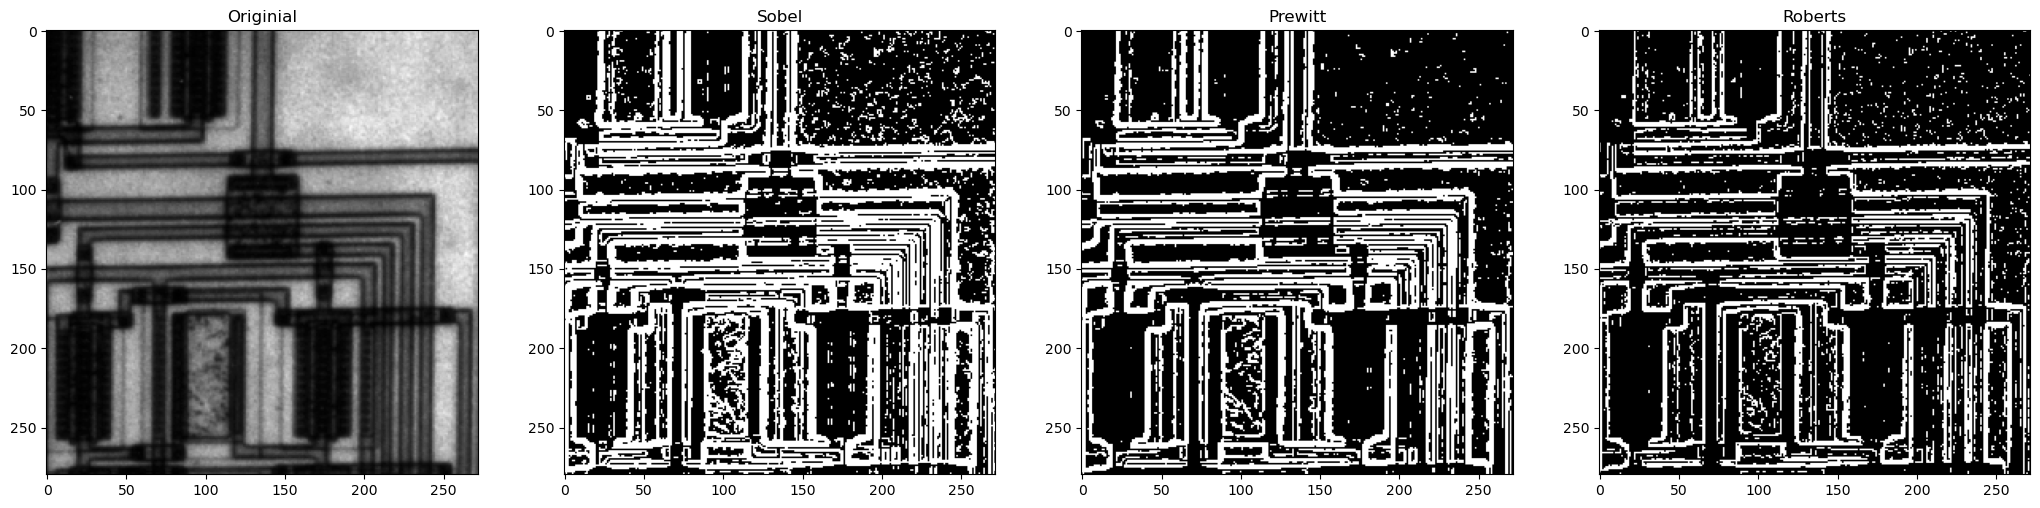

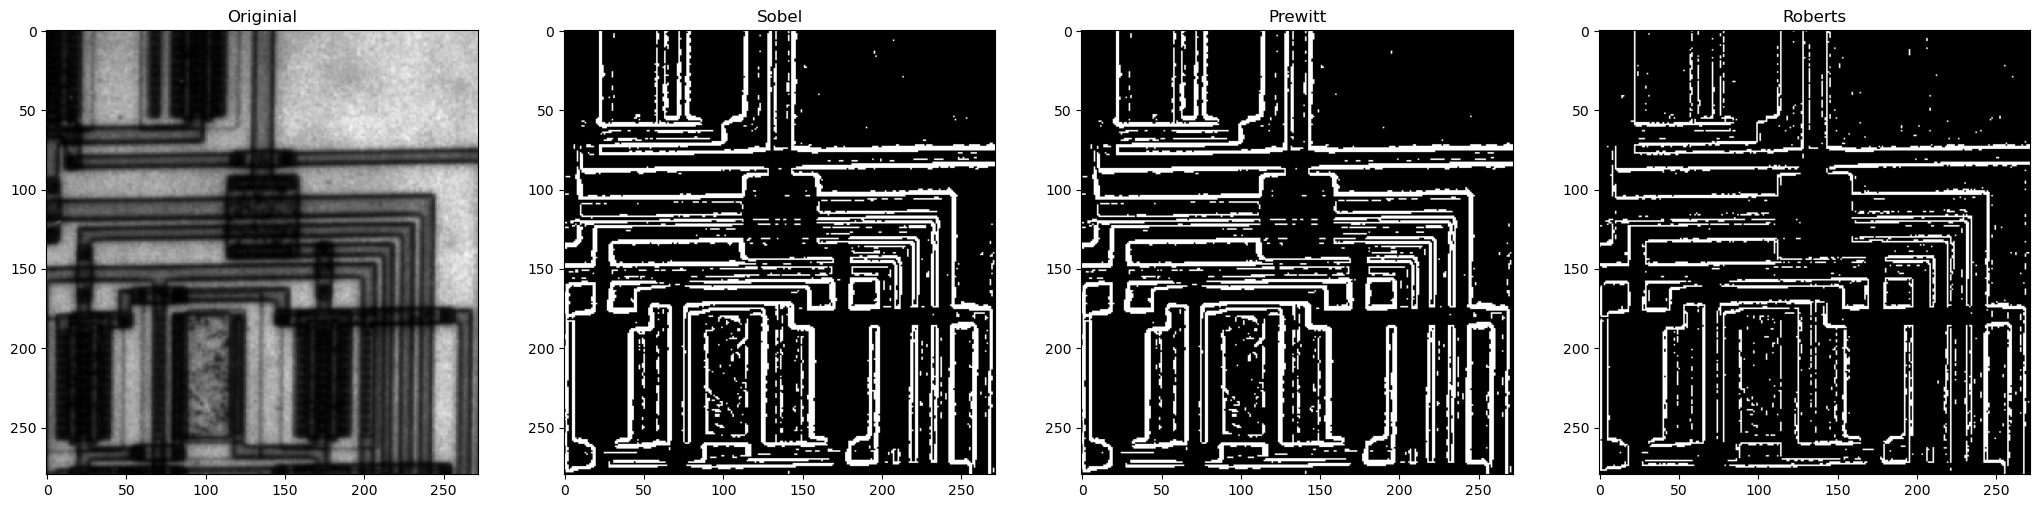

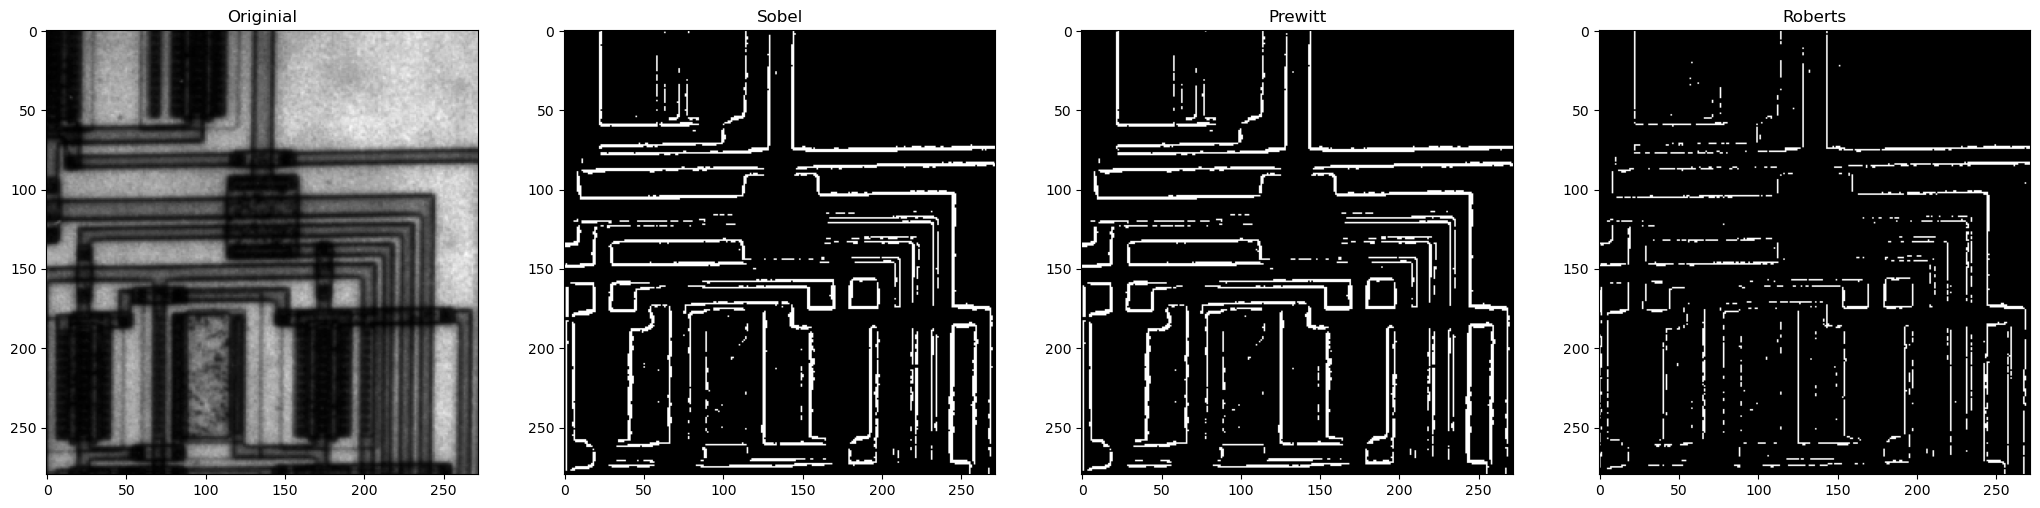

In [ ]:
#Different thresholding
show_images([img, edge_sobel>0.04, edge_prewitt>0.05, edge_roberts>0.05], ["Originial", "Sobel", "Prewitt", "Roberts"])

show_images([img, edge_sobel>0.07, edge_prewitt>0.07, edge_roberts>0.07], ["Originial", "Sobel", "Prewitt", "Roberts"])

show_images([img, edge_sobel>0.1, edge_prewitt>0.1, edge_roberts>0.1], ["Originial", "Sobel", "Prewitt", "Roberts"])

#Low threshold --> more noise
#high threshold --> less edges

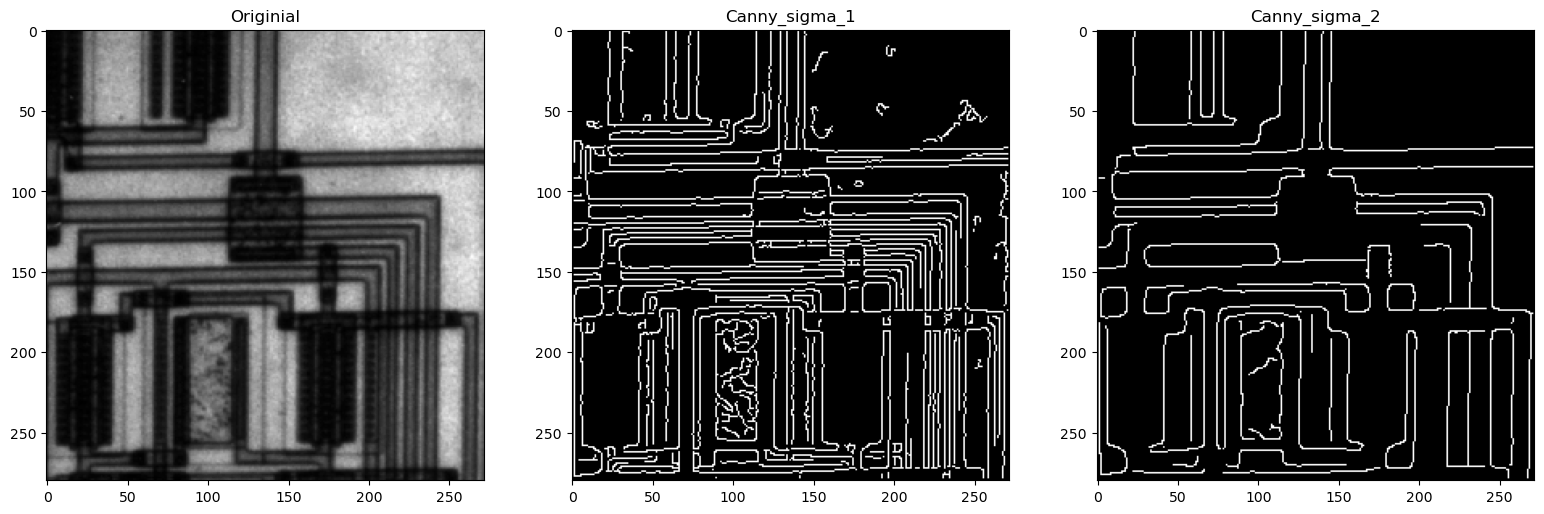

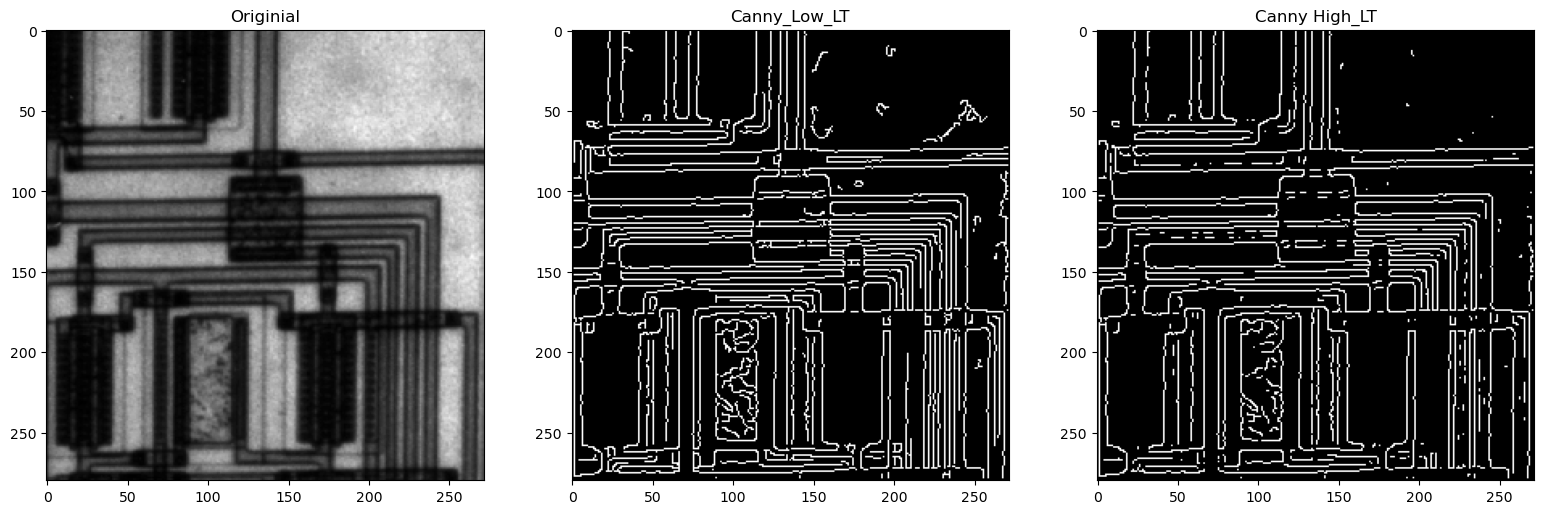

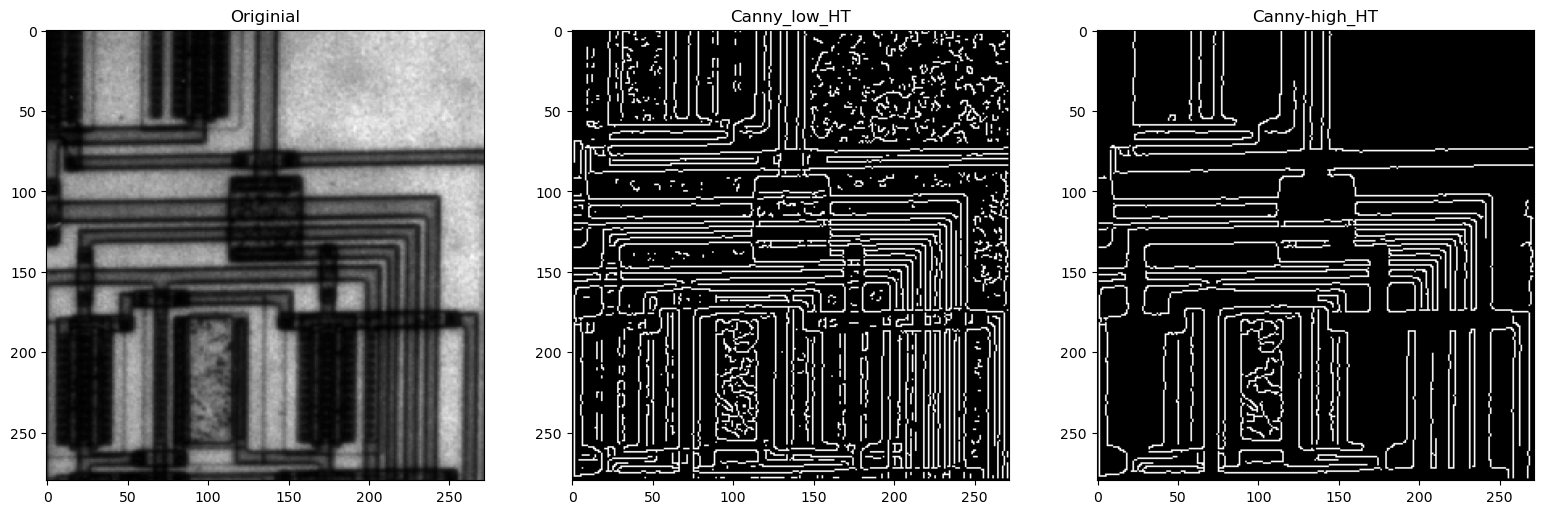

In [ ]:
#Changing canny parameters

#Sigma:
show_images([img, canny(img, sigma=1), canny(img, sigma=2)], ["Originial", "Canny_sigma_1", "Canny_sigma_2"])
#Increasing sigma intoduces less edges, less noise

#Low threshold:
show_images([img, canny(img,low_threshold=0.1*255), canny(img, low_threshold=0.2*255)], ["Originial", "Canny_Low_LT", "Canny High_LT"])
#increasing low threshold causes noise edges to break up.

#High threshold:
show_images([img, canny(img, high_threshold=0.1*255), canny(img, high_threshold=0.3*255)], ["Originial", "Canny_low_HT", "Canny-high_HT"])
#Decreasing HT too much causes false +ve 

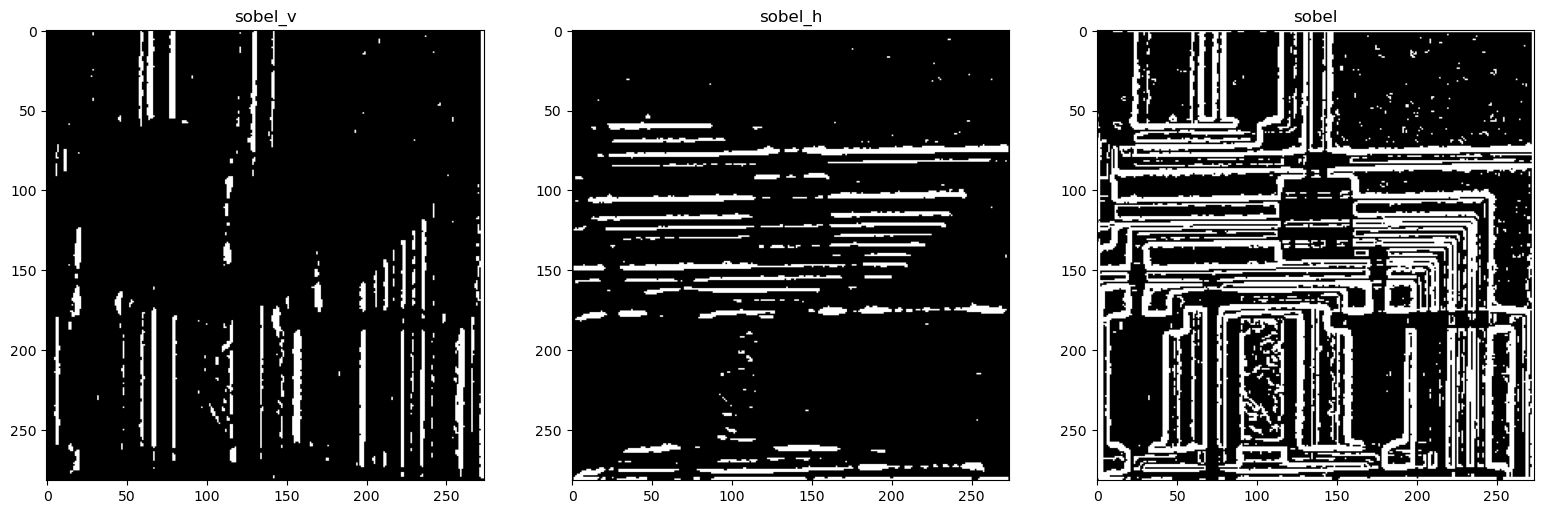

In [34]:
# 2. Custom Sobel (V-H-Both)
def sobel_custom(img, thres):
    hy = np.array([[-1, 0, 1], 
                   [-2, 0, 2], 
                   [-1, 0, 1]])
    
    hx = np.array([[-1,  -2, -1], 
                   [ 0,   0,  0], 
                   [ 1,   2,  1]])

    vertical = convolve2d(hy, img)
    horizontal = convolve2d(hx, img)
    both = np.sqrt(vertical**2 + horizontal**2)

    show_images([vertical > thres, horizontal > thres, both > thres],
             ['sobel_v', 'sobel_h', 'sobel'])


sobel_custom(img, thres=0.3*255)


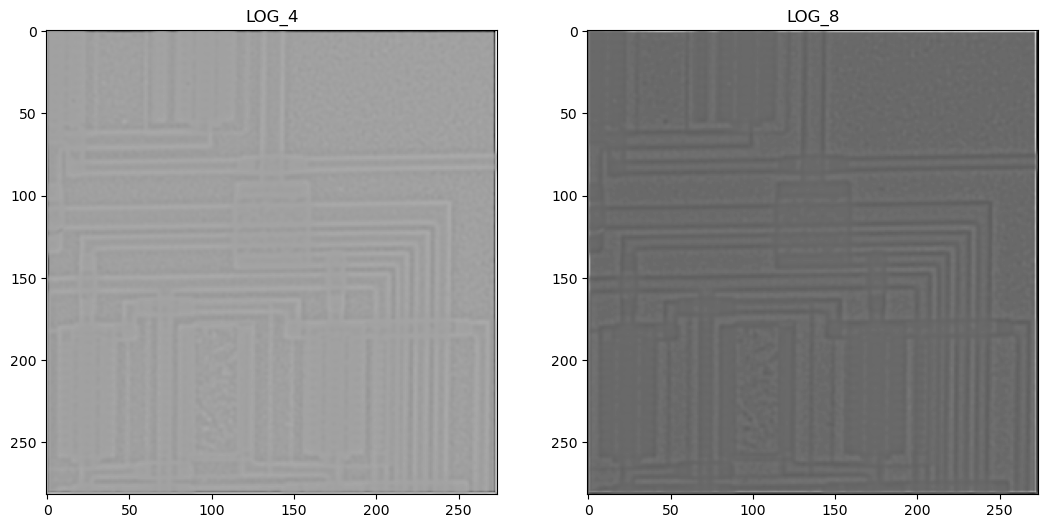

In [39]:
# 3. Custom LoG
thres= 20

def LOG_custom(img, sigma, thres):
    smoothed = gaussian(img, sigma=sigma)
    neighbors_8 = np.array([[-1, -1, -1],
                            [-1,  8, -1],
                            [-1, -1, -1]])
    
    neighbors_4 = np.array([[0,  1, 0],
                            [1, -4, 1],
                            [0,  1, 0]])
    
    LOG_4 = convolve2d(smoothed, neighbors_4)
    LOG_8 = convolve2d(smoothed, neighbors_8)

    LOG_4_thresholded = np.where(np.abs(LOG_4) > thres, LOG_4, 0)
    LOG_8_thresholded = np.where(np.abs(LOG_8) > thres, LOG_8, 0)
    show_images([LOG_4, LOG_8], ['LOG_4', 'LOG_8'])

LOG_custom(img, sigma=1, thres=thres)
    


In [46]:
'''
Optional
1-Make edge detection
2-Multiply by factor < 1
3-Subtract (Orginal Image) - (Edge Detection Image)
'''

'\nOptional\n1-Make edge detection\n2-Multiply by factor < 1\n3-Subtract (Orginal Image) - (Edge Detection Image)\n'